<a href="https://colab.research.google.com/github/FGalvao77/Introducao-a-redes-neurais-convolucionais-CNN-para-classificacao-de-imagens/blob/main/Introdu%C3%A7%C3%A3o_a_redes_neurais_convolucionais_(CNN)_para_classifica%C3%A7%C3%A3o_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

## **Introdução a redes neurais convolucionais (CNN) para classificação de imagens**
---
---

<br>

### **Introdução**

**Mas afinal, o que é rede neural convolucional?**

No contexto de _inteligência artificial_ e _aprendizagem de máquina_, uma `rede neural convolucional` (**CNN** do inglês _Convolutional Neural network_ ou _ConvNet_) é uma classe de rede neural artificial do tipo _feed-forward_, que vem sendo aplicada com sucesso no processamento e análise de imagens digitais.

Uma **CNN** usa uma variação de perceptrons multicamada desenvolvidos de modo a demandar o mínimo pré-processamento possível. Essas redes também são conhecidas como redes neurais artificiais invariantes a deslocamento (_shift invariant_) ou invariantes a espaço (_space invariant_), em ambos os casos representadas pela sigla em inglês `SIANN`.

As redes convolucionais são inspiradas nos processos biológicos. Nelas o padrão de conectividade entre os neurônios é inspirado na organização do córtex visual dos animais. Neurônios corticais individuais respondem a estímulos apenas em regiões restritas do campo de visão conhecidas como campos receptivos. Os campos receptivos de diferentes neurônios se sobrepõem parcialmente de forma a cobrir todo o campo de visão.

Uma CNN tende a demandar um nivel minimo de pre-processamento quando comparada a outros algoritmos de classificação de imagens. Isso significa que a rede "aprende" os filtros que em um algoritmo tradicional precisariam ser implementados manualmente. Essa independencia de um conhecimento a priori e do esforço humano no desenvolvimento de suas funcionalidades basicas pode ser considerada a maior vantagem de sua aplicação.

Esse tipo de rede é usada principalmente em reconhecimento de imagens e processamento de vídeo, embora já tenha sido aplicada com sucesso em experimentos envolvendo processamento de voz e linguagem natural.

Na saúde usa-se esta metodologia com algoritmos específicos, recorrendo a um grande número de fotografias clínicas, para o diagnóstico da retinopatia diabética e do cancro da pele, com resultados muito precisos e comparáveis aos clínicos especializados.

- **fonte:** https://pt.wikipedia.org/wiki/Rede_neural_convolucional

<br>

**Saiba mais!**

- https://www.deeplearningbook.com.br/introducao-as-redes-neurais-convolucionais/

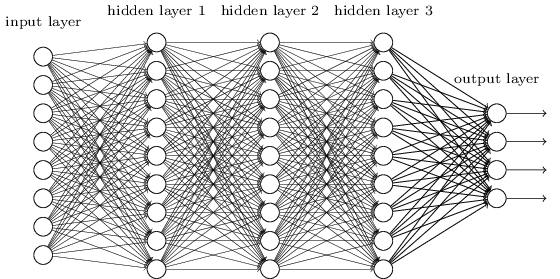 

_estrutura de uma rede neural artificial_

Para nossos estudos práticos, utilizaremos um conjunto de dados com imagens sintéticas. 

Segue abaixo o endereço do conjunto de dados:

- https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/horses_or_humans.py

In [1]:
# importando o conjunto de dados de treino com imagens de cavalos e humanos
!wget --no-check-certificate \
    https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip \
        -O /tmp/horse-or-human.zip

--2023-04-15 19:05:59--  https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.128, 173.194.213.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   151MB/s    in 0.9s    

2023-04-15 19:06:00 (151 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
# importando o conjunto de dados de validação com imagens de cavalos e humanos
!wget --no-check-certificate \
    https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip \
        -O /tmp/validation-horse-or-human.zip

--2023-04-15 19:06:02--  https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.128, 173.194.213.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2023-04-15 19:06:03 (116 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
# importando as bibliotecas iniciais
import os
import zipfile
import warnings

warnings.filterwarnings('ignore')

In [4]:
# realizando a descompactação dos arquivos dos conjuntos de imagens
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

zip_ref.close()

In [5]:
# instanciando os diretórios de imagens de treino - humanos e cavalos
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [6]:
# instanciando os diretórios de imagens de validação - humanos e cavalos
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [7]:
# visualizando os 20 primeiros arquivos de dados de treino - cavalos
train_horse_names = os.listdir(train_horse_dir)
# print(train_horse_names[:20])
train_horse_names[:20]

['horse35-8.png',
 'horse31-2.png',
 'horse17-3.png',
 'horse32-2.png',
 'horse22-2.png',
 'horse18-4.png',
 'horse31-4.png',
 'horse30-6.png',
 'horse25-7.png',
 'horse24-6.png',
 'horse28-6.png',
 'horse21-6.png',
 'horse42-3.png',
 'horse17-9.png',
 'horse02-2.png',
 'horse08-9.png',
 'horse05-4.png',
 'horse22-1.png',
 'horse10-7.png',
 'horse07-2.png']

In [8]:
# visualizando os 20 primeiros arquivos de dados de treino - humanos
train_human_names = os.listdir(train_human_dir)
# print(train_human_names[:20])
train_human_names[:20]

['human11-22.png',
 'human16-24.png',
 'human16-25.png',
 'human12-27.png',
 'human12-15.png',
 'human03-28.png',
 'human06-16.png',
 'human16-00.png',
 'human17-12.png',
 'human02-27.png',
 'human12-05.png',
 'human02-13.png',
 'human02-07.png',
 'human01-14.png',
 'human09-06.png',
 'human03-06.png',
 'human09-26.png',
 'human02-23.png',
 'human15-16.png',
 'human15-30.png']

In [9]:
# visualizando os 20 primeiros arquivos de dados de validação - cavalos
validation_horse_names = os.listdir(validation_horse_dir)
# print(validation_horse_names[:20])
validation_horse_names[:20]

['horse3-326.png',
 'horse5-478.png',
 'horse5-550.png',
 'horse6-064.png',
 'horse1-411.png',
 'horse5-514.png',
 'horse4-072.png',
 'horse2-582.png',
 'horse2-544.png',
 'horse2-011.png',
 'horse2-368.png',
 'horse5-259.png',
 'horse4-495.png',
 'horse3-498.png',
 'horse4-043.png',
 'horse1-436.png',
 'horse3-217.png',
 'horse1-170.png',
 'horse5-002.png',
 'horse3-198.png']

In [10]:
# visualizando os 20 primeiros arquivos de dados de validação - humanos
validation_human_names = os.listdir(validation_human_dir)
# print(validation_human_names[:20])
validation_human_names[:20]

['valhuman01-04.png',
 'valhuman05-03.png',
 'valhuman05-26.png',
 'valhuman02-00.png',
 'valhuman02-01.png',
 'valhuman05-17.png',
 'valhuman04-03.png',
 'valhuman03-13.png',
 'valhuman01-18.png',
 'valhuman04-02.png',
 'valhuman01-17.png',
 'valhuman05-01.png',
 'valhuman01-16.png',
 'valhuman01-03.png',
 'valhuman01-02.png',
 'valhuman03-02.png',
 'valhuman03-00.png',
 'valhuman04-22.png',
 'valhuman01-20.png',
 'valhuman02-15.png']

In [11]:
# visualizando a quantidade de imagens em cada diretório
print(f'Total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'Total training human images: {len(os.listdir(train_human_dir))}\n')
print(f'Total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'Total validation human images: {len(os.listdir(validation_human_dir))}')

Total training horse images: 500
Total training human images: 527

Total validation horse images: 128
Total validation human images: 128


In [12]:
# importando as bibliotecas para visualização
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [13]:
# defininido alguns parâmetros de visualização
n_rows = 4      # linhas
n_cols = 4      # colunas

pic_idx = 0

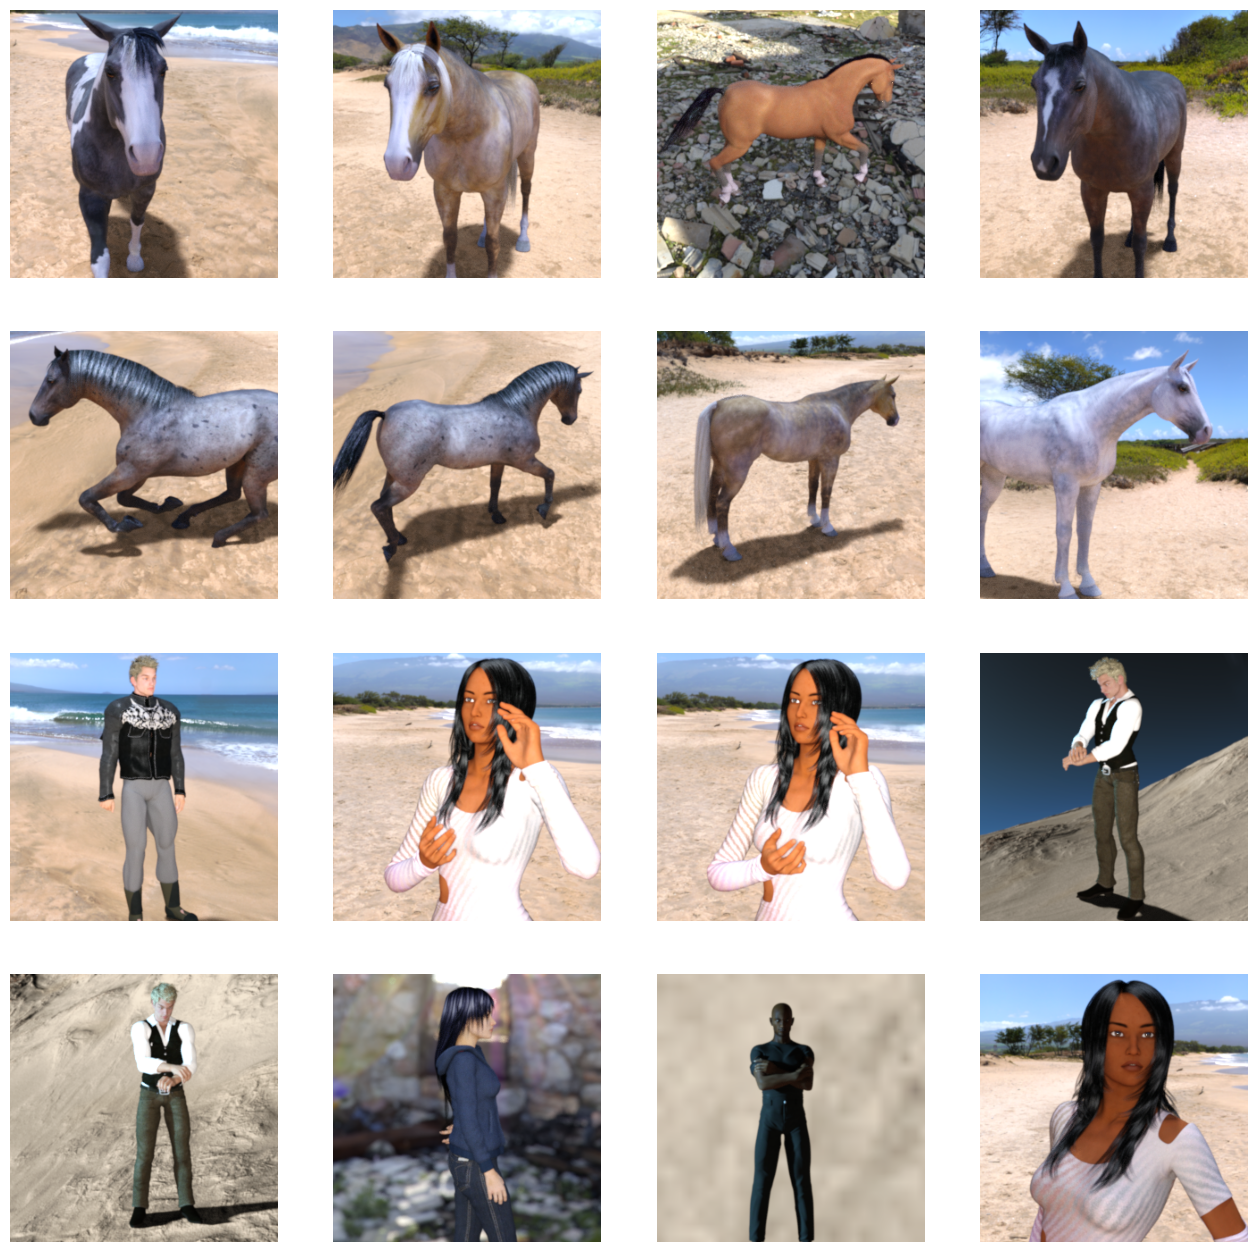

In [14]:
# realizando a visualização de algumas imagens
fig = plt.gcf()

fig.set_size_inches(n_cols * 4, n_rows * 4)
pic_idx += 8

next_horse_pix = [os.path.join(train_horse_dir, fname)
    for fname in train_horse_names[pic_idx-8:pic_idx]]

next_human_pix = [os.path.join(train_human_dir, fname)
    for fname in train_human_names[pic_idx-8:pic_idx]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    img = plt.subplot(n_rows, n_cols, i + 1)
    img.axis('off')

    img_ = mpimg.imread(img_path)
    plt.imshow(img_)

plt.show()

In [15]:
# importando a biblioteca para construção da RNA e visualizando sua versão atual
import tensorflow as tf

print(f'[VERSION] - TensorFlow: {tf.__version__}')

[VERSION] - TensorFlow: 2.12.0


In [16]:
# construindo a RNA convolucional
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), 
                           activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32, (3, 3), 
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), 
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), 
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
# visualizando o sumário da rede
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [18]:
# importando o módulo para otimização da rede
from keras.optimizers import RMSprop

In [19]:
# instanciando o otimizador
OPTIMIZER = RMSprop(learning_rate=00.001)

In [20]:
# compilando a rede e definindo seus parâmetros
model.compile(
    loss='binary_crossentropy',
    # optimizer='adam',
    optimizer=OPTIMIZER,
    metrics=['acc']
)

In [21]:
# importando o módulo para escalonamento das imagens
from keras.preprocessing.image import ImageDataGenerator

In [22]:
# aplicando o escalonamento das imagens - treino e validação
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [23]:
# instanciando o gerador de treinamento da rede
train_generator = train_datagen.flow_from_directory(
    directory='/tmp/horse-or-human/', 
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [24]:
# instanciando o gerador de validação da rede
validation_generator = validation_datagen.flow_from_directory(
    directory='/tmp/validation-horse-or-human/', 
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [25]:
# realizando o treinamento e validação da rede e, seus resultados instanciando no objeto "history"
history = model.fit_generator(
    generator=train_generator,              # dados de treino
    steps_per_epoch=8,                      # passos por época
    epochs=20,                              # número de épocas
    verbose=1,                              # imprimindo o processamento da rede
    validation_data=validation_generator,   # dados de validação
    validation_steps=8,                     # passos de validação
    shuffle=True                            # embaralhamento dos dados
)

Epoch 1/20
8/8 [==============================] - 21s 1s/step - loss: 2.1152 - acc: 0.4883 - val_loss: 0.6316 - val_acc: 0.8984
Epoch 2/20
8/8 [==============================] - 9s 1s/step - loss: 0.6642 - acc: 0.5762 - val_loss: 0.5646 - val_acc: 0.6172
Epoch 3/20
8/8 [==============================] - 9s 1s/step - loss: 0.5386 - acc: 0.7608 - val_loss: 0.6495 - val_acc: 0.6719
Epoch 4/20
8/8 [==============================] - 12s 2s/step - loss: 0.2850 - acc: 0.8877 - val_loss: 1.9367 - val_acc: 0.8008
Epoch 5/20
8/8 [==============================] - 9s 1s/step - loss: 0.1278 - acc: 0.9433 - val_loss: 2.8709 - val_acc: 0.6562
Epoch 6/20
8/8 [==============================] - 8s 1s/step - loss: 0.6512 - acc: 0.7842 - val_loss: 0.5158 - val_acc: 0.8438
Epoch 7/20
8/8 [==============================] - 9s 1s/step - loss: 0.2584 - acc: 0.8977 - val_loss: 2.5858 - val_acc: 0.7422
Epoch 8/20
8/8 [==============================] - 10s 1s/step - loss: 0.0718 - acc: 0.9700 - val_loss: 1.9103

In [26]:
# importando as bibliotecas para realizar o carregamento de imagens para teste da rede/modelo
import numpy as np
import keras.utils as image

from google.colab import files

Saving test_image.png to test_image.png
1/1 [==============================] - 0s 495ms/step
[1.]
test_image.png

This is a HUMAN!!!


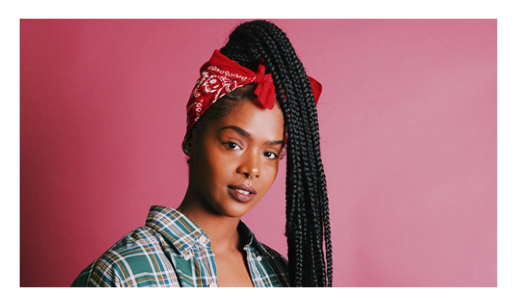

In [27]:
# realizando o "upload" de uma imagem, seja de humano ou de um cavalo para classificção da rede
uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn

    img = image.load_img(path, target_size=(300, 300))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    my_img = mpimg.imread(path, -1)
    
    plt.axis('off')
    plt.imshow(my_img,)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])

    if classes[0] > 0.5:
        print(fn + '\n\nThis is a HUMAN!!!')
    else:
        print(fn + '\n\nThis is a HORSE!!!')

In [28]:
# importando as bibliotecas
import random        
import keras.utils as image

1/1 [==============================] - 0s 132ms/step


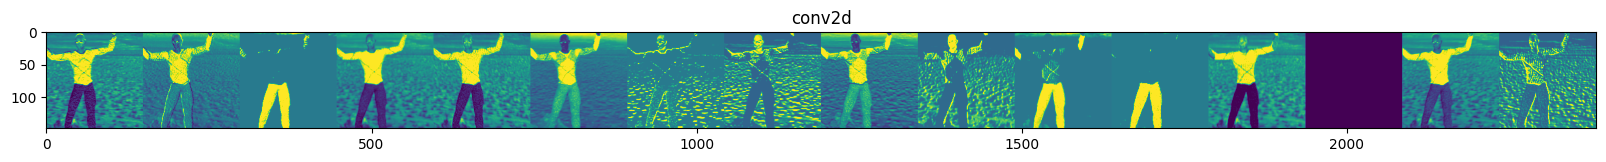

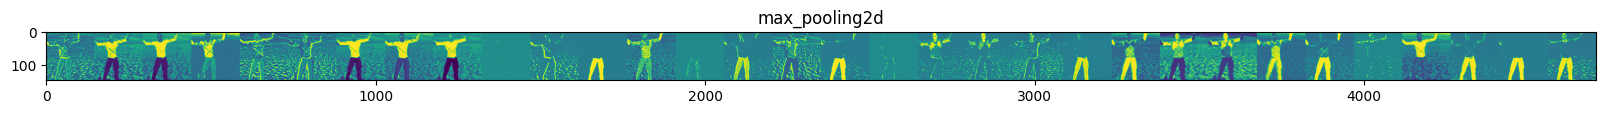

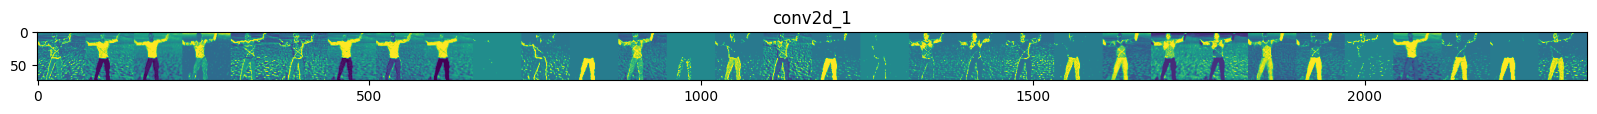

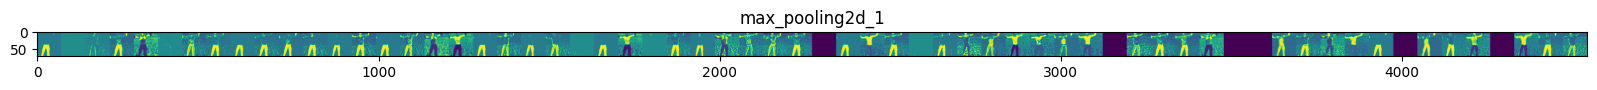

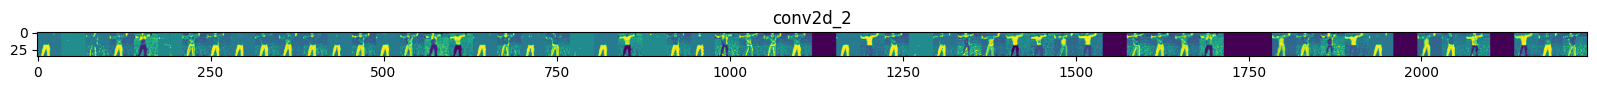

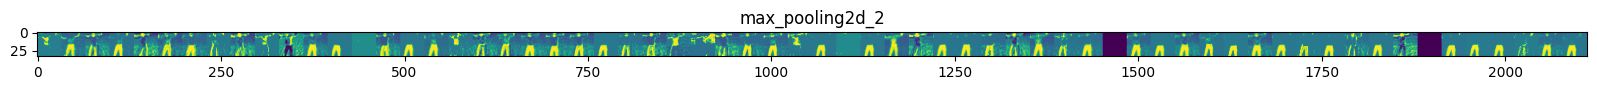

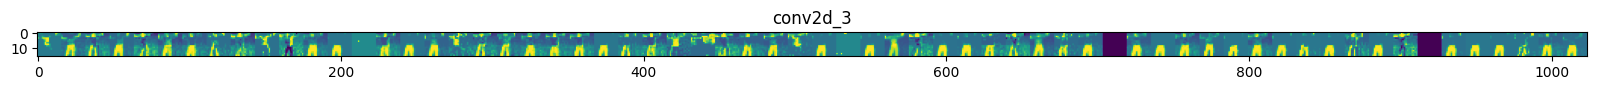

In [29]:
# visualizando as etapas (filtros) utilizados pela rede em seu processo de treinamento
sucessive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs=model.input,
                                            outputs=sucessive_outputs)

horse_img_files = [
    os.path.join(train_horse_dir, f) for f in train_horse_names
]

human_img_files = [
    os.path.join(train_human_dir, f) for f in train_human_names
]

img_path = random.choice(horse_img_files + human_img_files) # correção aqui

img = image.load_img(path=img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)

x /= 255

sucessive_feature_maps = visualization_model.predict(x)

layers_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layers_names, sucessive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]  # correção aqui

        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std() 
            x *= 64
            x += 128

            x = np.clip(x, 0, 255).astype('uint8')

            display_grid[:, i * size:(i + 1) * size] = x

        scale = 20.0 / n_features

        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, cmap='viridis', aspect='auto')

In [30]:
# inspecionando o ambiente
%ls

sample_data/  test_image.png


In [31]:
# visualizando as variávies de ambiente
%whos

Variable                 Type                  Data/Info
--------------------------------------------------------
ImageDataGenerator       type                  <class 'keras.preprocessi<...>mage.ImageDataGenerator'>
OPTIMIZER                RMSprop               <keras.optimizers.legacy.<...>object at 0x7f77958b4610>
RMSprop                  type                  <class 'keras.optimizers.legacy.rmsprop.RMSprop'>
classes                  ndarray               1x1: 1 elems, type `float32`, 4 bytes
display_grid             ndarray               16x1024: 16384 elems, type `float64`, 131072 bytes (128.0 kb)
feature_map              ndarray               1x1: 1 elems, type `float32`, 4 bytes
fig                      Figure                Figure(1600x1600)
files                    module                <module 'google.colab.fil<...>s/google/colab/files.py'>
fn                       str                   test_image.png
history                  History               <keras.callbacks.History <.

<br>

### **Material extra**

- [Deep Learning Book](https://www.deeplearningbook.com.br/deep-learning-a-tempestade-perfeita/)

- [Aprenda a Criar e Treinar Uma Rede Neural Convolucional (CNN)](https://www.insightlab.ufc.br/aprenda-a-criar-e-treinar-uma-rede-neural-convolucional-cnn/)